# 서울시 CCTV 통계 .csv

In [1]:
import pandas as pd

In [2]:
# 1. 파일에서 데이터 읽어오기
# CCTV 파일 읽어오기
CCTV_seoul = pd.read_csv('CCTV_in_Seoul.csv', encoding='utf-8')
type(CCTV_seoul)

pandas.core.frame.DataFrame

In [3]:
CCTV_seoul

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613
5,광진구,878,573,78,53,174
6,구로구,1884,1142,173,246,323
7,금천구,1348,674,51,269,354
8,노원구,1566,542,57,451,516
9,도봉구,825,238,159,42,386


In [5]:
# head = 상위 5개의 값 출력
# ()안에 값을넣어 값조절 가능
CCTV_seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613
5,광진구,878,573,78,53,174
6,구로구,1884,1142,173,246,323
7,금천구,1348,674,51,269,354
8,노원구,1566,542,57,451,516
9,도봉구,825,238,159,42,386


In [ ]:
# tail = 하위 5개의 값 출력
# ()안에 값을넣어 값조절 가능
CCTV_seoul.tail()

In [6]:
CCTV_seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [7]:
# CCTV의 파일과 인구수 파일을 합칠때 컬럼을 통일하려한다.
# CCTV에서는 기관명 / 인구수 통계에서는 자치구로 표현 

# rename으로 '기관명' -> '구별'
# inplace = True는 불러온 파일의 정보자체를 변경 커밋(원본파일이 아닌 불러온 상태에서)
CCTV_seoul.rename(columns={CCTV_seoul.columns[0] : '구별'}, inplace=True)
CCTV_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [17]:
# sort함수로 특정값(컬럼)으로 순위 표현 
# ascending=False는 소계 내림차순 표현 / 기본값은 True = 오름차순 
CCTV_sorted = CCTV_seoul.sort_values(by='소계', ascending=False)
CCTV_sorted

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398
4,관악구,2109,846,260,390,613
21,은평구,2108,1138,224,278,468
20,용산구,2096,1368,218,112,398
6,구로구,1884,1142,173,246,323
10,동대문구,1870,1070,23,198,579
16,성북구,1651,1009,78,360,204
22,종로구,1619,464,314,211,630


In [18]:
CCTV_sorted.head(1)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932


In [19]:
CCTV_sorted.tail(1)

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386


In [22]:
# CCTV_seoul 증가율 컬럼 추가 - (2014~2016/2013이전 ) * 100
CCTV_seoul['증가율'] = ((CCTV_seoul['2014년']+ CCTV_seoul['2015년']+ CCTV_seoul['2016년'] / CCTV_seoul['2013년도 이전']) *100)

#증가율이 가장 낮은 5개 표현 / ascding 기본값은 True = 오름차순 이니까 
CCTV_seoul.sort_values(by='증가율').head()
#CCTV_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,증가율
17,송파구,1081,529,21,68,463,8987.523629
13,서대문구,1254,844,50,68,292,11834.597156
5,광진구,878,573,78,53,174,13130.366492
18,양천구,2482,1843,142,30,467,17225.339121
9,도봉구,825,238,159,42,386,20262.184874


# 서울시 인구수 .csv

In [25]:
# 파이썬 파일과 경로가 같으면 경로 적을 필요 없음
pop_seoul = pd.read_excel("population_in_Seoul.xls")
pop_seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


In [28]:
# header=2 index 맨위 2줄은 생략해라라는 뜻
# usecols ='B,D,G,J,N'은 엑셀안에서 알파벳 컬럼 B,D,G,J,N 표기하겠다는 의미
pop_seoul = pd.read_excel("population_in_Seoul.xls", header=2, usecols ='B,D,G,J,N')
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [36]:
# 보기 쉽게 rename 메소드 이용
# 0번 컬럼 - 구별
# 1번 컬럼 - 인구수
# 2번 컬럼 - 한국인
# 3번 컬럼 - 외국인
# 4번 컬럼 - 고령자 로 변경
# pop_seoul.rename(columns={pop_seoul.columns[0] : '구별',
#                  pop_seoul.columns[1] : '인구수',
#                   pop_seoul.columns[2] : '한국인',
#                   pop_seoul.columns[3] : '외국인',
#                    pop_seoul.columns[4] : '고령자'}, inplace=True)

pop_seoul.rename(columns={pop_seoul.columns[0] : '구별'}, inplace=True)
pop_seoul.rename(columns={pop_seoul.columns[1] : '인구수'}, inplace=True)
pop_seoul.rename(columns={pop_seoul.columns[2] : '한국인'}, inplace=True)
pop_seoul.rename(columns={pop_seoul.columns[3] : '외국인'}, inplace=True)
pop_seoul.rename(columns={pop_seoul.columns[4] : '고령자'}, inplace=True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


0번 인덱스행의 데이터는 총합계이므로 필요없다 - 삭제
확인
'구별'의 데이터값 확인
'구별'의 na값 확인
na값 확인된 행 삭제
삭제 확인

In [37]:
#0번 인덱스행의 데이터는 총합계이므로 필요없다 - 삭제
pop_seoul.drop([0], inplace=True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [39]:
# '구별'의 데이터값 확인
pop_seoul['구별'].values
pop_seoul.tail()


,구별,인구수,한국인,외국인,고령자
22,서초구,450310.0,445994.0,4316.0,51733.0
23,강남구,570500.0,565550.0,4950.0,63167.0
24,송파구,667483.0,660584.0,6899.0,72506.0
25,강동구,453233.0,449019.0,4214.0,54622.0
26,NaN,NaN,NaN,NaN,NaN


In [40]:
# 26번행에 쓸데없는 값 삭제 필요
pop_seoul.drop([26], inplace=True)
pop_seoul.tail()

,구별,인구수,한국인,외국인,고령자
21,관악구,525515.0,507203.0,18312.0,68082.0
22,서초구,450310.0,445994.0,4316.0,51733.0
23,강남구,570500.0,565550.0,4950.0,63167.0
24,송파구,667483.0,660584.0,6899.0,72506.0
25,강동구,453233.0,449019.0,4214.0,54622.0


외국인 비율 열을 추가한다 ; 인구수 대비 외국인 비율을 계산한다
고령자 비율 열을 추가한다 ; 인구수 대비 고령자 비율 계산
인구수 가장 많은 상위구 5개 조회
외국인 가장 많은 상위구 5개 조회
고령자 가장 많은 상위구 5개 조회

In [52]:
# 외국인 비율 열을 추가한다 ; 인구수 대비 외국인 비율을 계산한다
pop_seoul['외국인비율'] = pop_seoul['외국인'] / pop_seoul['인구수'] * 100
# 고령자 비율 열을 추가한다 ; 인구수 대비 고령자 비율 계산
pop_seoul['고령자비율'] = pop_seoul['고령자'] / pop_seoul['인구수'] * 100

In [53]:
# 외국인 비율 상위 5곳
pop_seoul.sort_values(by='외국인비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [51]:
# 외국인 상위 5곳 
pop_seoul.sort_values(by='외국인', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [50]:
# 고령자비율 상위 5곳
pop_seoul.sort_values(by='고령자비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


In [49]:
# 고령자 상위 5곳
pop_seoul.sort_values(by='고령자', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [48]:
# 인구수 상위 5곳
pop_seoul.sort_values(by='인구수', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


## 서울시 CCTV 숫자 + 서울시 인구수 

In [92]:
# 서울시 CCTV 숫자 + 서울시 인구수
data_result = pd.merge(CCTV_seoul, pop_seoul)
data_result


,구별,소계,2013년도 이전,2014년,2015년,2016년,증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,101472.136223,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,1010,379,99,155,377,25499.472296,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,831,369,120,138,204,25855.284553,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,911,388,258,184,81,44220.876289,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,2109,846,260,390,613,65072.458629,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
5,광진구,878,573,78,53,174,13130.366492,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849
6,구로구,1884,1142,173,246,323,41928.283713,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
7,금천구,1348,674,51,269,354,32052.522255,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
8,노원구,1566,542,57,451,516,50895.202952,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
9,도봉구,825,238,159,42,386,20262.184874,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507


In [93]:
#소계, 증가율만 필요
# 2013~2016 열 삭제
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']

In [94]:
#구별 행인덱스 지정 / inplace 값 커밋
data_result.set_index('구별', inplace=True)

### 결과값 그래프로 표현 

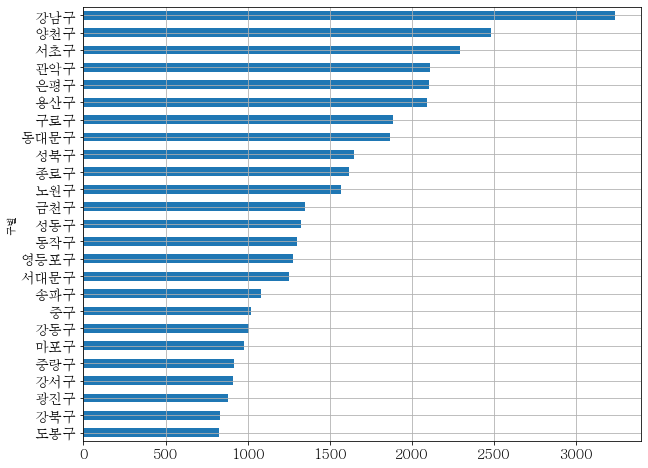

In [95]:
# 인구수와 소계 피벗 테이블
# 상관관계 분석 y = ax+b
# 그래프
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Batang'
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize']=(10, 8)
plt.rcParams['axes.labelsize']=10
plt.rcParams['axes.grid']=True

# 소계 그래프 표현
# pandas를 통해 표현
# barh = 막대그래프
data_result['소계'].sort_values().plot(kind='barh')
plt.show()

<AxesSubplot:title={'center':'CCTV비율'}, xlabel='CCTV비율', ylabel='구별'>

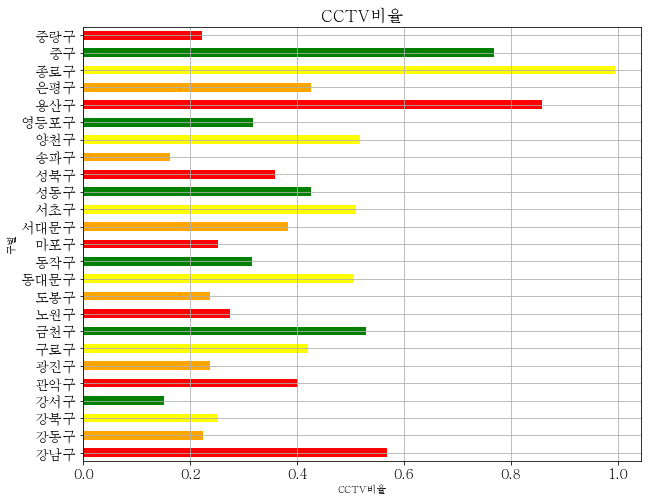

In [96]:
#CCTV비율 컬럼추가 = 소계 / 인구수 * 100
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100
plt.xlabel('CCTV비율')
plt.ylabel('구별')
plt.title('CCTV비율')

#.sort안하면 순서대로 표현
# color = 정해준 색상 순차 표현
data_result['CCTV비율'].plot(kind= 'barh', color=['red', 'orange', 'yellow', 'green'])

Text(0.5, 1.0, '인구수별 카메라')

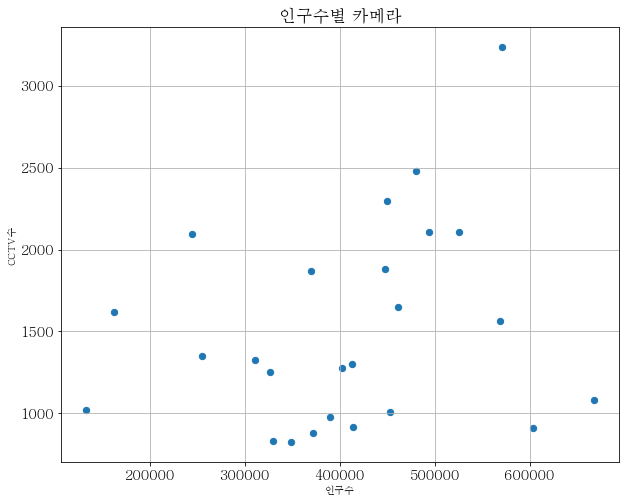

In [97]:
# scatter / s= 점의 사이즈 
plt.scatter(data_result['인구수'], data_result['소계'], s= 40)
plt.xlabel('인구수')
plt.ylabel('CCTV수')
plt.title('인구수별 카메라')

In [98]:
#
import numpy as np
fp = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp

array([1.15151285e-03, 1.04561312e+03])

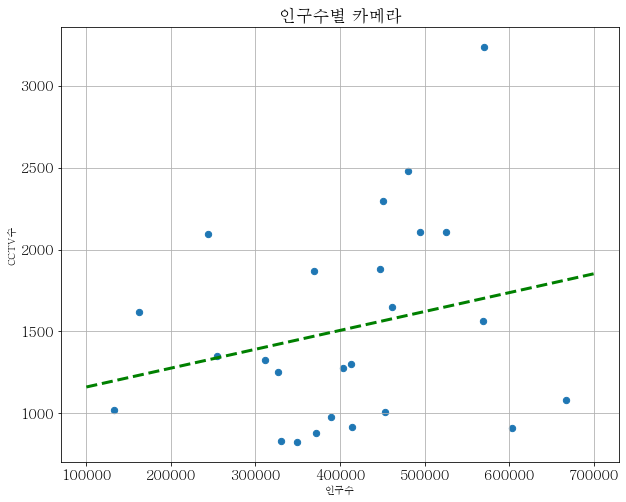

In [101]:
#인구수와 소계의 상관관계를 구하는 방정식
fp1 = np.poly1d(fp)
#평균선 표기 10만~70만 
fx = np.linspace(100000, 700000, 100)


plt.scatter(data_result['인구수'], data_result['소계'], s= 40)
plt.plot(fx, fp1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV수')
plt.title('인구수별 카메라')
plt.show()